In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set(style="whitegrid")


In [256]:
df = pd.read_csv("/Users/sanskarranjan/Downloads/Dataset.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

Level1

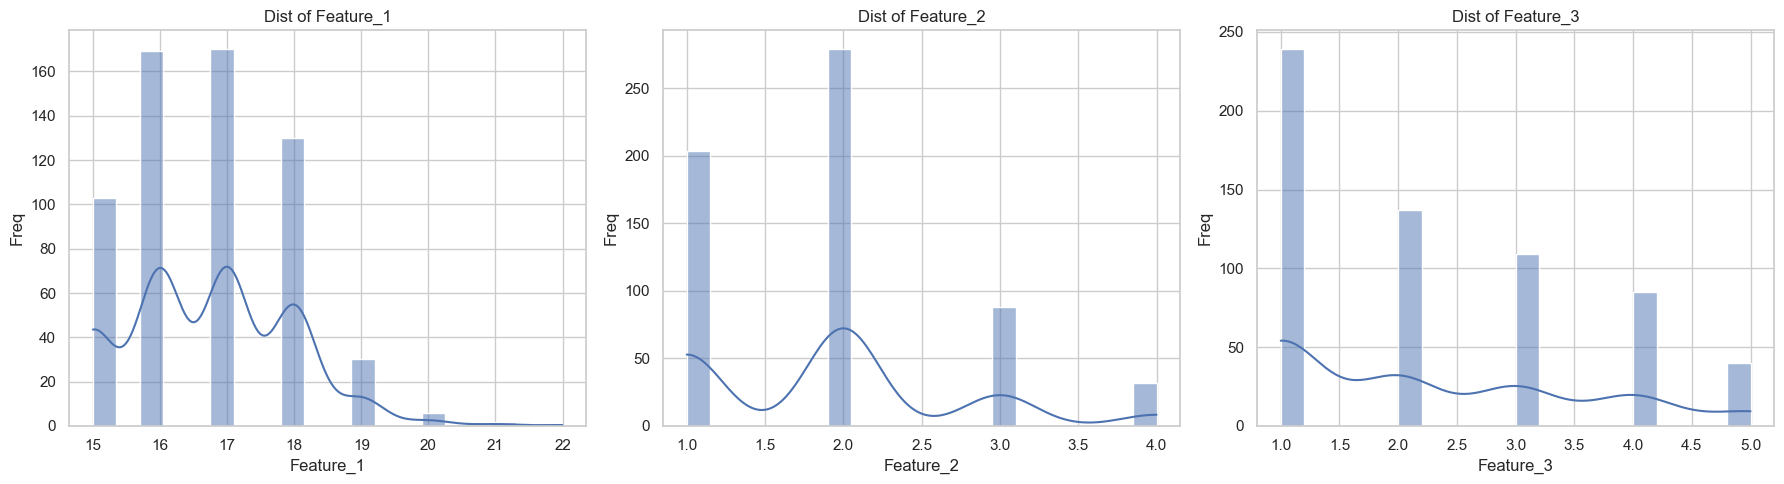

In [257]:
plt.figure(figsize=(18, 5))
for i, feature in enumerate(['Feature_1', 'Feature_2', 'Feature_3'], 1):
    plt.subplot(1, 3, i)  
    sns.histplot(df[feature], bins=20, kde=True) 
    plt.title(f'Dist of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Freq')

plt.tight_layout()
plt.show()

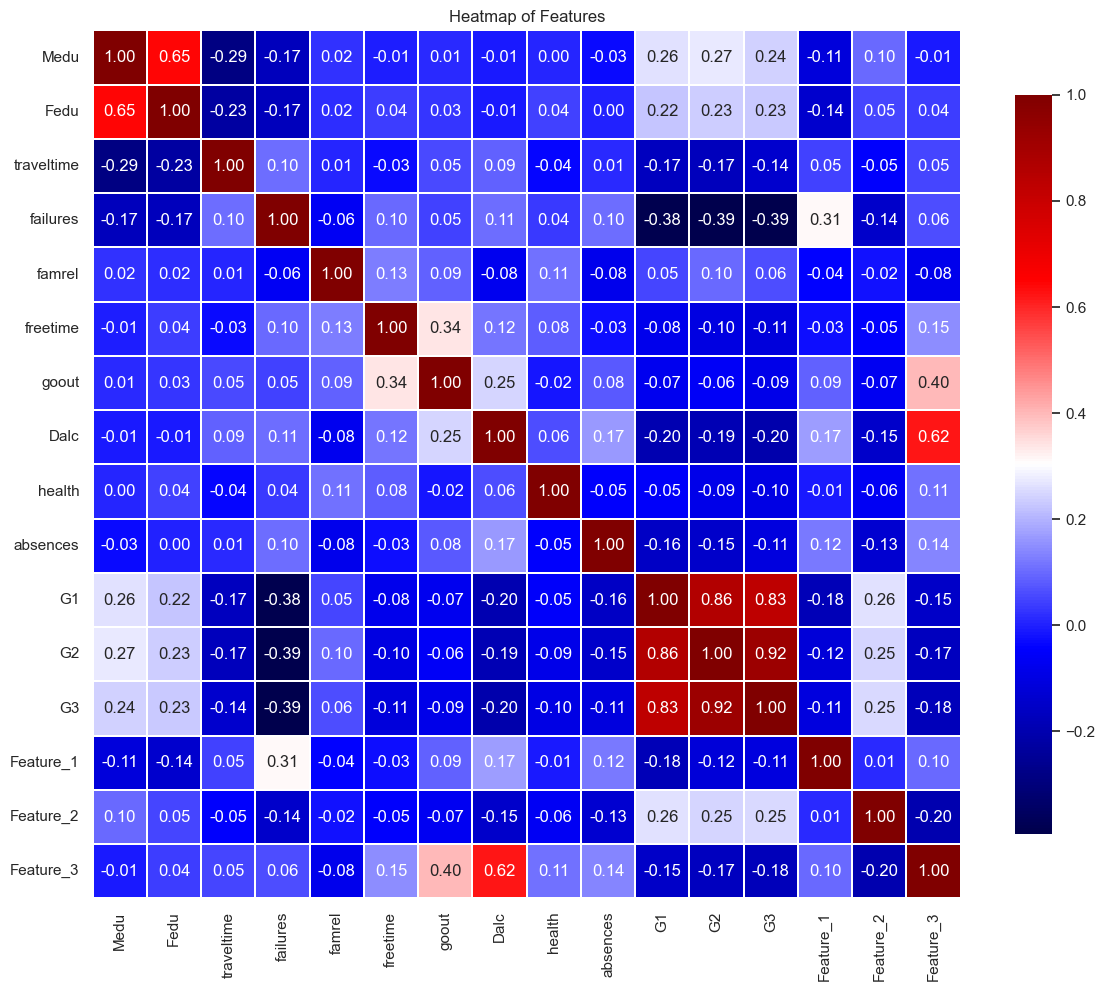

In [258]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,        
    fmt=".2f",        
    cmap="seismic",  
    square=True,
    linewidths=0.3,    
    cbar_kws={'shrink': .8}  
)
plt.title("Heatmap of Features")
plt.show()

In [259]:
missing = df.isnull().sum()
missing_feats = missing[missing > 0]
print("Features with missing values:", missing_feats)

Features with missing values: famsize       50
Fedu          73
traveltime    73
higher        76
freetime      45
absences      69
G2            35
Feature_1     38
Feature_2     46
Feature_3     39
dtype: int64


LEVEL2

In [ ]:
df_cleaned = df.copy()
df_cleaned.columns=["school","sex","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","failures","schoolsup","famsup","paid","activities","nursery","higher","internet","famrel","freetime","goout","Dalc","health","absences","G1","G2","G3","age","studytime","extrovertednes","romantic"]
df_cleaned['famsize'].fillna(df_cleaned['famsize'].mode()[0], inplace=True)

df_cleaned['Fedu'].fillna(df_cleaned['Fedu'].median(), inplace=True)
df_cleaned['traveltime'].fillna(df_cleaned['traveltime'].median(), inplace=True)
df_cleaned['freetime'].fillna(df_cleaned['freetime'].median(), inplace=True)
df_cleaned['absences'].fillna(df_cleaned['absences'].median(), inplace=True)
df_cleaned['age'].fillna(df_cleaned['age'].median(), inplace=True)
df_cleaned['studytime'].fillna(df_cleaned['studytime'].median(), inplace=True)
df_cleaned['extrovertednes'].fillna(df_cleaned['extrovertednes'].median(), inplace=True)
df_cleaned['higher'].fillna(df_cleaned['higher'].mode()[0], inplace=True)
df_cleaned['G2'] = df_cleaned.apply(
    lambda row: (row['G1'] + row['G3']) / 2 
    if pd.isnull(row['G2']) and not (np.isnan(row['G1']) or np.isnan(row['G3'])) 
    else row['G2'],
    axis=1
)
df_cleaned['G2'].fillna(df_cleaned['G2'].median(), inplace=True)
    
df_cleaned = df_cleaned.dropna(subset=['romantic'])


/var/folders/cf/dg3vj6091_57y_wxvpvs2htw0000gn/T/ipykernel_81253/2147967872.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['famsize'].fillna(df_cleaned['famsize'].mode()[0], inplace=True)
/var/folders/cf/dg3vj6091_57y_wxvpvs2htw0000gn/T/ipykernel_81253/2147967872.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [261]:
missing_ = df_cleaned.isnull().sum()
missing_feat = missing_[missing_ > 0]

if not missing_feat.empty:
    print("Features with missing values:", missing_feat)
else:
    print("No features have missing values.")

No features have missing values.


LEVEL3

Q1-How does traveltime affect grades?

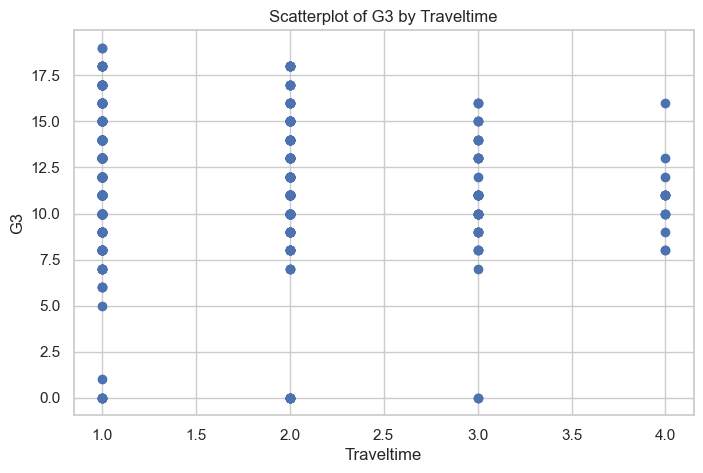

In [269]:
plt.figure(figsize=(8, 5))
plt.scatter(df_cleaned['traveltime'], df_cleaned['G3'])
plt.xlabel('Traveltime')
plt.ylabel('G3')
plt.title('Scatterplot of G3 by Traveltime')
plt.show()


Q2-Does extrovertedness relate with absences?

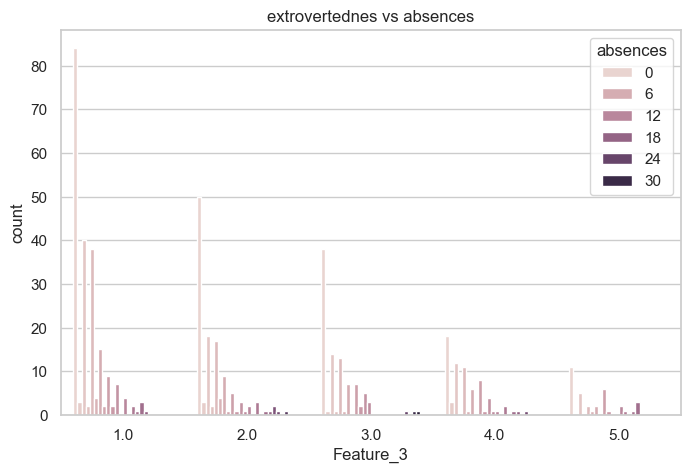

In [272]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Feature_3', hue='absences', data=df)
plt.title("extrovertednes vs absences")
plt.show()

 Q3-Do students in romantic relationships show absence in periods?

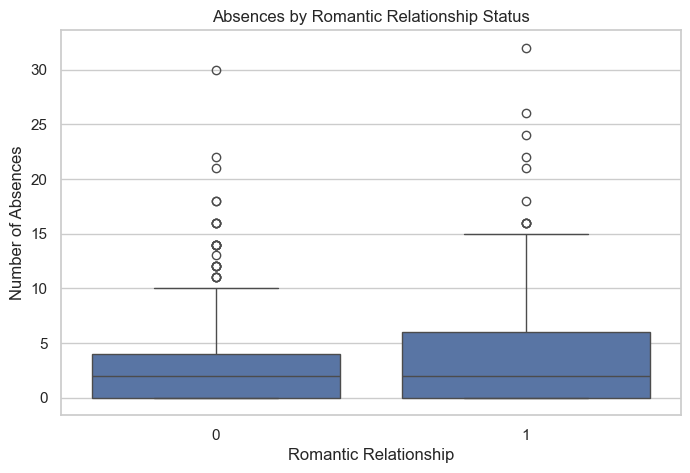

In [278]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='romantic', y='absences', data=df_cleaned)
plt.title('Absences by Romantic Relationship Status')
plt.xlabel('Romantic Relationship')
plt.ylabel('Number of Absences')
plt.show()

Q4-Which address students have higher weekly alcohol consumption?

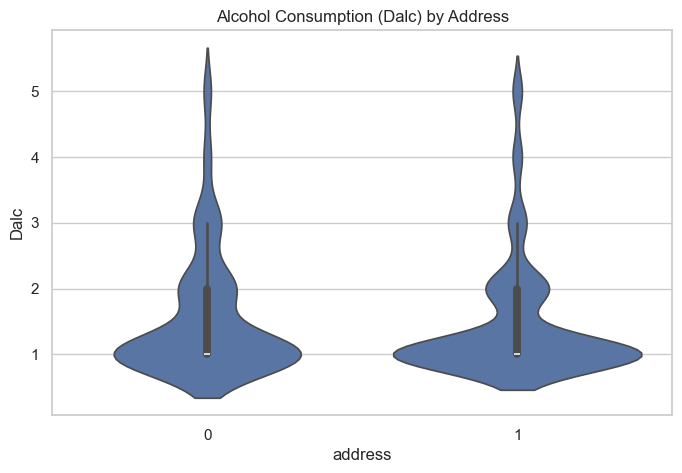

In [277]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='address', y='Dalc', data=df_cleaned)
plt.title('Alcohol Consumption (Dalc) by Address')
plt. show()

Q5-How do family relationship quality influence romantic involvement?

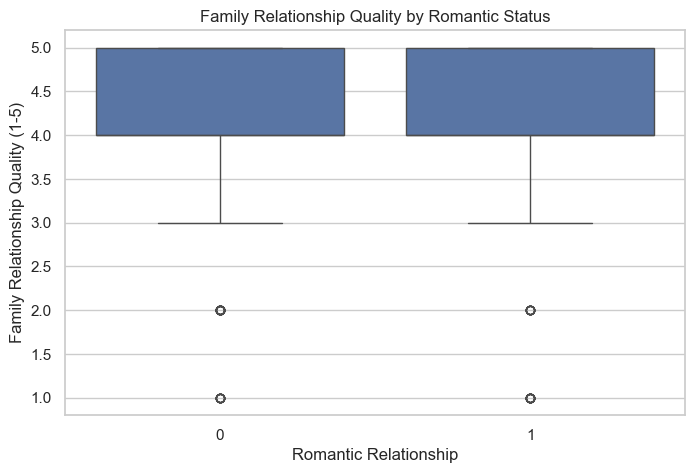

In [276]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='romantic', y='famrel', data=df_cleaned)
plt.title('Family Relationship Quality by Romantic Status')
plt.xlabel('Romantic Relationship')
plt.ylabel('Family Relationship Quality (1-5)')
plt.show()

level4

random forest


In [264]:

df_cleaned['romantic'] = df_cleaned['romantic'].map({'yes': 1, 'no': 0})


categcols = df_cleaned.select_dtypes(include='object').columns
label_encoders = {}
for col in categcols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

X = df_cleaned.drop(columns=['romantic'])
y = df_cleaned['romantic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.6153846153846154
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.91      0.75        81
           1       0.46      0.12      0.19        49

    accuracy                           0.62       130
   macro avg       0.55      0.52      0.47       130
weighted avg       0.57      0.62      0.54       130

Confusion Matrix: [[74  7]
 [43  6]]


logistic regression


In [265]:

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

importance = pd.Series(model.coef_[0], index=X.columns)
print("Top features influencing romantic relationships:")
print(importance.sort_values(ascending=False).head(10))


Accuracy Score: 0.5692307692307692
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.79      0.70        81
           1       0.37      0.20      0.26        49

    accuracy                           0.57       130
   macro avg       0.50      0.50      0.48       130
weighted avg       0.53      0.57      0.53       130

Confusion Matrix: [[64 17]
 [39 10]]
Top features influencing romantic relationships:
age           0.324434
G1            0.308921
Dalc          0.230520
activities    0.198588
internet      0.180089
absences      0.175390
school        0.118795
Medu          0.115693
studytime     0.109390
guardian      0.092738
dtype: float64


level5


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


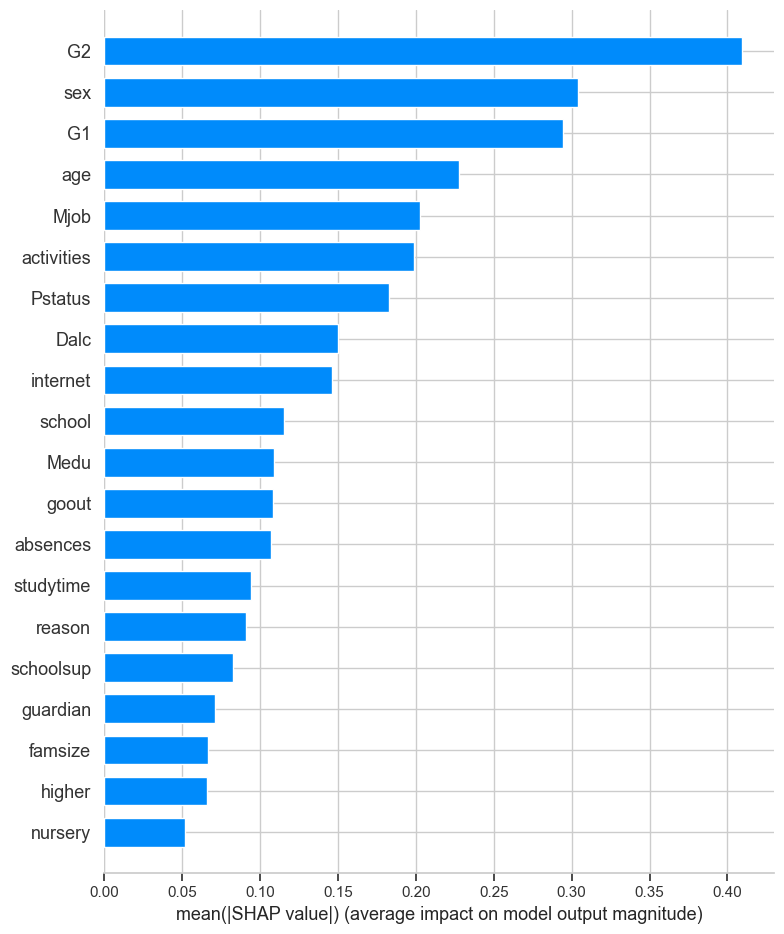

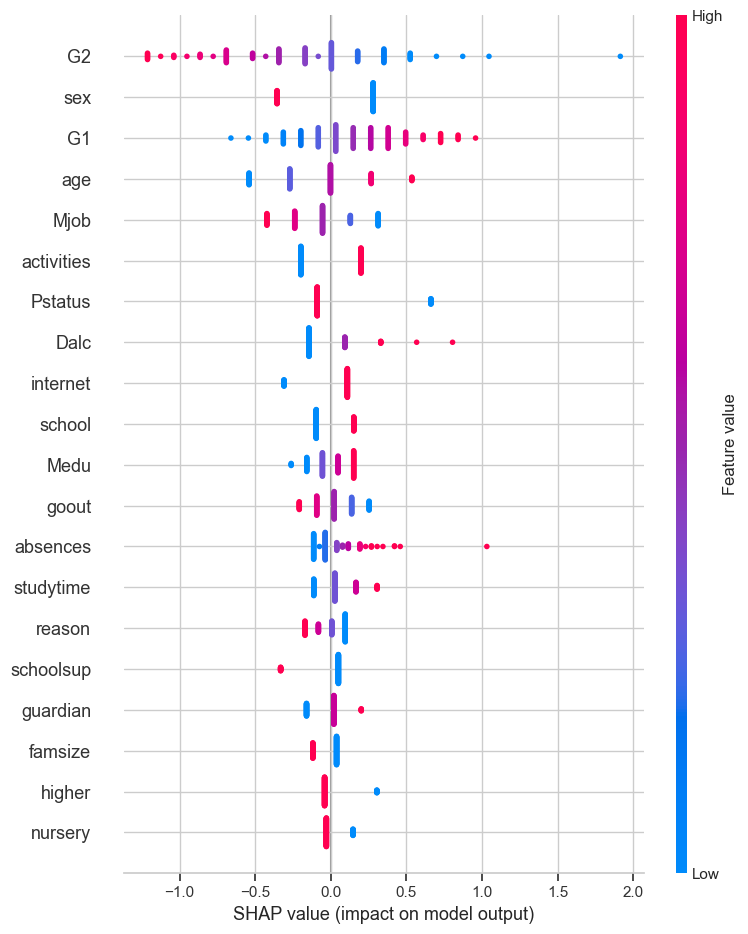

In [266]:

explainer = shap.LinearExplainer(model, X_train_scaled, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_scaled)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
shap.summary_plot(shap_values, X_test_df, plot_type="bar")
shap.summary_plot(shap_values, X_test_df)

